In [2]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn 
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7], [11], [15] ]
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
device = 'cpu'
print(device)
X = X.to(device)
Y = Y.to(device)


cpu


In [4]:

class DS(Dataset):
    def __init__(self, x, y):
        # Converte x e y para tensores e move para o dispositivo
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
        
    def __len__(self):
        return len(self.x)
        
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

ds = DS(x, y)
d1 = DataLoader(ds, batch_size=2, shuffle=True)
# Cria DataLoader para o dataset com batch size de 2 e embaralhamento


In [5]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 8) # Camada densa com 2 entradas e 8 saídas
        self.activation = nn.ReLU()   # Função de ativação ReLU
        self.layer2 = nn.Linear(8, 1) # Camada densa com 8 entradas e 1 saída
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

In [6]:

loss_func = nn.MSELoss()
model = NN()
opt = SGD(model.parameters(), lr=0.0001)
# Define a função de perda MSE e o otimizador SGD com taxa de aprendizado baixa

losses = []

for _ in range(50):
    for data in d1:
        opt.zero_grad()
        x1, y1 = data
        loss_value = loss_func(model(x1), y1)
        loss_value.backward()
        opt.step()
        losses.append(loss_value.detach().numpy())
        # Treina o modelo e armazena o valor da perda

Text(0, 0.5, 'loss value')

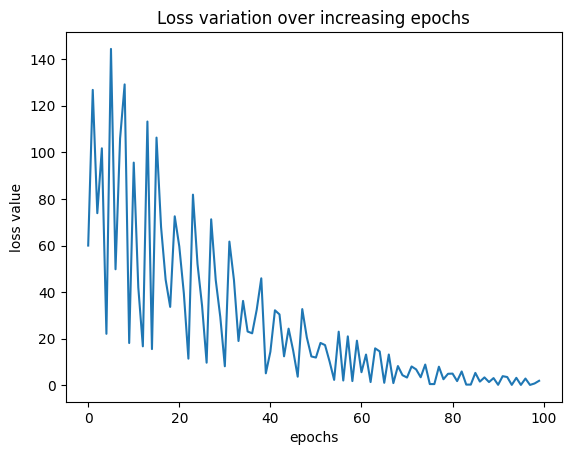

In [7]:

plt.plot(losses)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')
# Plota a variação da perda ao longo das épocas